In [5]:
# magic! (don't worry about this)
%load_ext autoreload
%autoreload 2
#%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# let us import some useful things
%matplotlib notebook
import pylab 
import scipy 
import scipy.stats
import numpy as np 

# Standard Normal Distribution

In [23]:
### DEFINE SOME HELPER FUNCTIONS
def clear_the_figure_and_empty_points_list():
    global coords_array 
    global point_handles_array  
    # Reset our variables to be empty
    coords_array = scipy.array([])
    point_handles_array = scipy.array([])
    handle_of_normal_curve_plot = []
    handle_of_mean_plot = []
    handle_of_std_lines = []
    ### Clear the figure window
    pylab.clf()  # clf means "clear the figure"
    ### In order to keep the boundaries of the figure fixed in place,
    ### we will draw a black box around the region that we want.
    pylab.plot(axis_x_range*scipy.array([-1, 1, 1, -1]),
           scipy.array([axis_y_lower_lim,axis_y_lower_lim,axis_y_upper_lim,axis_y_upper_lim]),'k-')
    ### We want a long title, so we put a \n in the middle, to start a new line of title-text      
    multiline_title_string = 'Click to add points, on old points to delete,' \
                             ' outside axes to reset.\n' \
                             'Dot shows the mean. Vertical dotted lines show STDs from mean'
    pylab.title(multiline_title_string)
    pylab.grid(True)  # Add a grid on to the figure window
    pylab.axis([-axis_x_range, axis_x_range, axis_y_lower_lim, axis_y_upper_lim])
    ### Because we are only looking at the x-axis mean and std,
    ### we will only show tick-labels on the x-axis
    pylab.xticks( scipy.arange(-axis_x_range,axis_x_range,2) )
    pylab.yticks([0])
    pylab.draw()  # Make sure that the newly cleaned figure is drawn
    
# This is the function which calculates and plots the statistics
def plot_the_mean_std_and_normal():
    # First, delete any existing normal-curve and mean plots from the figure
    global handle_of_normal_curve_plot
    global handle_of_mean_plot
    global handle_of_std_lines
    pylab.setp(handle_of_normal_curve_plot,visible=False)
    pylab.setp(handle_of_mean_plot,visible=False)
    pylab.setp(handle_of_std_lines,visible=False)    
    #### Next, calculate and plot the stats
    x_coords =  coords_array[:,0]  ### x-coords are the first column, which is 0 in Python
    x_mean = scipy.average(x_coords)
    x_std = scipy.std(x_coords)
    handle_of_mean_plot = pylab.plot(x_mean,0,'ro',markersize=8)
    x_range_to_plot = scipy.linspace(-axis_x_range,axis_x_range,100) # Specify a range of curve-positions to plot
    normal_curve = 1/(x_std*scipy.sqrt(2*scipy.pi)) * scipy.exp(
                         -(x_range_to_plot-x_mean)**2  / (2 * x_std**2) )
    ### If we want, we can cross-check this against the scipy function norm.pdf
    #normal_curve_from_scipy = scipy.stats.norm.pdf(x_range_to_plot,x_mean,x_std)
    handle_of_normal_curve_plot = pylab.plot(x_range_to_plot,normal_curve,'r-')
    ### Now add on lines showing the standard deviations
    std_to_show = scipy.linspace(-3,3,7)  
    std_x_values = x_mean + std_to_show*x_std
    std_normal_curve_values = scipy.stats.norm.pdf(std_x_values,x_mean,x_std)
    # In order to plot these std lines all at once,
    # we will make arrays with the first row as the starting points
    # and the second row as the end points
    std_lines_x_array = scipy.vstack((std_x_values,std_x_values))
    std_lines_y_array = scipy.vstack((scipy.zeros((1,7)),std_normal_curve_values))
    handle_of_std_lines = pylab.plot(std_lines_x_array,std_lines_y_array,'r--')
    # Now display the n, mean and STD info
    number_of_points = scipy.shape(coords_array)[0] # Recount how many points we have now
    pylab.xlabel('n = ' + str(number_of_points) +
          '   Mean = ' + str(round(x_mean,2)) +  # The ',2' means show 2 decimal places
          ',  STD = '  + str(round(x_std,2)) )
    # Set the axis back to its original value, in case Python has changed it during plotting
    pylab.axis([-axis_x_range, axis_x_range, axis_y_lower_lim, axis_y_upper_lim])

    
# This is the function which gets called when the mouse is clicked in the figure window
def do_this_when_the_mouse_is_clicked(this_event):
    global coords_array 
    global point_handles_array
    x = this_event.xdata
    y = this_event.ydata
    ### If the click is outside the range, then clear figure and points list
    if this_event.xdata is None: # This means we clicked outside the axis
        clear_the_figure_and_empty_points_list()
    else: # We clicked inside the axis
        number_of_points = scipy.shape(coords_array)[0]
        if number_of_points > 0:
            point_to_be_deleted = check_if_click_is_on_an_existing_point(x,y)  
            if point_to_be_deleted != -1: # We delete a point
                # We will delete that row from coords_array. The rows are axis 0
                coords_array = scipy.delete(coords_array,point_to_be_deleted,0)
                # We will also hide that point on the figure, by finding its handle
                handle_of_point_to_be_deleted = point_handles_array[point_to_be_deleted]
                pylab.setp(handle_of_point_to_be_deleted,visible=False)
                # Now that we have erased the point with that handle,
                # we can delete that handle from the handles list
                point_handles_array = scipy.delete(point_handles_array,point_to_be_deleted)
            else:  # We make a new point
                coords_array = scipy.vstack((coords_array,[x,y]))
                this_point_num = scipy.shape(coords_array)[0]
                new_point_handle = pylab.plot(x,y,'*',color='blue')
                point_handles_array = scipy.append(point_handles_array,new_point_handle) 
        if number_of_points == 0:
            coords_array = scipy.array([[x,y]])
            this_point_num = scipy.shape(coords_array)[0]
            new_point_handle = pylab.plot(x,y,'*',color='blue')
            point_handles_array = scipy.append(point_handles_array,new_point_handle)
        ### Now plot the statistics that this program is demonstrating
        number_of_points = scipy.shape(coords_array)[0] # Recount how many points we have now
        if number_of_points > 1: 
            plot_the_mean_std_and_normal()
        ### Finally, check to see whether we have fewer than two points
        ### as a result of any possible point-deletions above.
        ### If we do, then delete the stats info from the plot, 
        ### as it isn't meaningful for just one data point
        number_of_points = scipy.shape(coords_array)[0]  
        if number_of_points < 2: # We only show mean and std if there are two or more points
            pylab.setp(handle_of_normal_curve_plot,visible=False)
            pylab.setp(handle_of_mean_plot,visible=False)
            pylab.setp(handle_of_std_lines,visible=False)        
            pylab.xlabel('')
        # Set the axis back to its original value, in case Python has changed it during plotting
        pylab.axis([-axis_x_range, axis_x_range, axis_y_lower_lim, axis_y_upper_lim])
        pylab.draw()  # Make sure that the new changes to the figure are drawn

# This is the function which deletes existing points if you click on them       
def check_if_click_is_on_an_existing_point(mouse_x_coord,mouse_y_coord):
    # First, figure out how many points we have.
    # Each point is one row in the coords_array,
    # so we count the number of rows, which is dimension-0 for Python
    number_of_points = scipy.shape(coords_array)[0]    
    this_coord = scipy.array([[ mouse_x_coord, mouse_y_coord ]]) 
            # The double square brackets above give the this_coord array 
            # an explicit structure of having rows and also columns
    if number_of_points > 0:  
        # If there are some points, we want to calculate the distance
        # of the new mouse-click location from every existing point.
        # One way to do this is to make an array which is the same size
        # as coords_array, and which contains the mouse x,y-coords on every row.
        # Then we can subtract that xy_coord_matchng_matrix from coords_array
        ones_vec = scipy.ones((number_of_points,1))
        xy_coord_matching_matrix = scipy.dot(ones_vec,this_coord)
        distances_from_existing_points = (coords_array - xy_coord_matching_matrix)
        # Because the x and y axes have different scales,
        # we need to rescale the distances so that itdoesn't matter whether
        # you try to delete a dot by clicking near it in the x or y directions.
        # When we extract the columns of distances_from_existing_points,
        # scipy returns the values as row vectors for some reason.
        # So, we transpose them back to column vectors and stack them horizontally
        axis_range_scaled_distances = scipy.hstack(
            ( distances_from_existing_points[:,0].reshape(-1,1)/(2*axis_x_range),
              distances_from_existing_points[:,1].reshape(-1,1)/(axis_y_upper_lim-axis_y_lower_lim) ) )
        squared_distances_from_existing_points = axis_range_scaled_distances**2
        sum_sq_dists = scipy.sum(squared_distances_from_existing_points,axis=1) 
                   # The axis=1 means "sum over dimension 1", which is columns for Python          
        euclidean_dists = scipy.sqrt(sum_sq_dists)
        distance_threshold = 0.01
        within_threshold_points = scipy.nonzero(euclidean_dists < distance_threshold )
        num_within_threshold_points = scipy.shape(within_threshold_points)[1]
        if num_within_threshold_points > 0:
            # We only want one matching point.
            # It's possible that more than one might be within threshold.
            # So, we take the unique smallest distance
            point_to_be_deleted = scipy.argmin(euclidean_dists)
            return point_to_be_deleted
        else: # If there are zero points, then we are not deleting any 
            point_to_be_deleted = -1
            return point_to_be_deleted


<IPython.core.display.Javascript object>


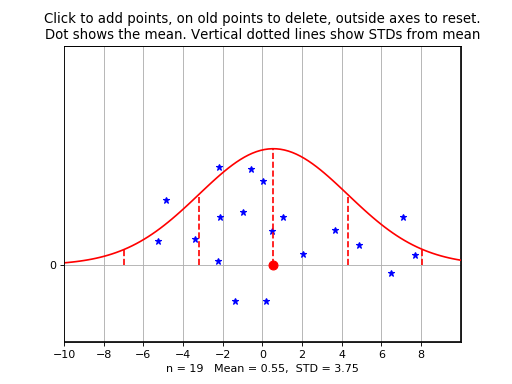

In [24]:
#######################################################################
# This is the main part of the program, which calls the above functions 
#######################################################################
# First, initialise some of our variables to be empty
coords_array = scipy.array([])
point_handles_array = scipy.array([])
handle_of_normal_curve_plot = []
handle_of_mean_plot = []
handle_of_std_lines = []
### Set up an initial space to click inside
axis_x_range = 10
axis_y_upper_lim = 0.2
axis_y_lower_lim = -0.07
### Make the figure window
pylab.figure()
### Clear the figure window
pylab.clf() # clf means "clear the figure"
### In order to keep the boundaries of the figure fixed in place,
### we will draw a black box around the region that we want.
pylab.plot(axis_x_range*scipy.array([-1, 1, 1, -1]),
           scipy.array([axis_y_lower_lim,axis_y_lower_lim,axis_y_upper_lim,axis_y_upper_lim]),'k-')
### Tell Python to call a function every time
### when the mouse is pressed in this figure
pylab.connect('button_press_event', do_this_when_the_mouse_is_clicked)

clear_the_figure_and_empty_points_list()
pylab.show()    # This shows the figure window onscreen
    






Some things to try: 
1. Click to add n=10 points. Their mean x-value is the large red dot. The vertical lines show standard deviation (SD) distances from the mean. How many of the points lie within one SD of the mean? How many of the points lie within two SDs of the mean? 
2. Click to add more points, putting most of them near the mean. How many points do you need altogether before some of them start to lie more than two SDs away from the mean? 
3. When it is three standard deviations away from the mean, the bell-shaped Normal distribution curve is very close to zero. It is so close that you might not even be able to see the very short vertical dotted lines at the 3 SD marks. Click to add a lot of points near the mean, so that the Normal curve gets taller and thinner, and add a couple of far-distant points at the sides. See if you can get some points to lie more than 3 SDs from the mean.

In [15]:
#Ok, how do our cancer datasets look in terms of mean and standard deviation? 
# load the datasets as numpy arrays
data=np.asarray(np.loadtxt("../data/prostate_normal_tumor_matrix.txt"))
labels=np.asarray(np.loadtxt("../data/prostate_normal_tumor_labels.txt"))

In [16]:
#Let's pick a gene to analyze: 
gene_id=100

In [17]:
normal_sample_indices=np.where(labels==0)
tumor_sample_indices=np.where(labels==1)

normal_samples=data[normal_sample_indices,gene_id]
tumor_samples=data[tumor_sample_indices,gene_id]

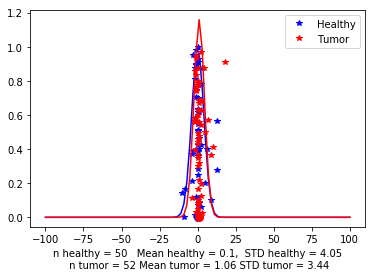

In [18]:
axis_x_range = 100
axis_y_upper_lim = 1
axis_y_lower_lim = -0.07
pylab.figure()


#plot the distribution for our normal samples! 
x=np.reshape(normal_samples,(normal_samples.shape[1],1))
y=np.random.random(x.shape[0])
y=np.reshape(y,(x.shape[0],1))
pylab.plot(x,y,'*',color='blue',label="Healthy")
x_mean = scipy.average(x)
x_std = scipy.std(x)
pylab.plot(x_mean,0,'bo',markersize=8)
x_range_to_plot = scipy.linspace(-axis_x_range,axis_x_range,100) # Specify a range of curve-positions to plot
normal_curve = 1/(x_std*scipy.sqrt(2*scipy.pi)) * scipy.exp(
                         -(x_range_to_plot-x_mean)**2  / (2 * x_std**2) )
pylab.plot(x_range_to_plot,10*normal_curve,'b-')
numpoints_healthy=x.shape[0]
mean_healthy=x_mean 
std_healthy=x_std 


#and for the tumor samples! 
x=np.reshape(tumor_samples,(tumor_samples.shape[1],1))
y=np.random.random(x.shape[0])
y=np.reshape(y,(x.shape[0],1))
pylab.plot(x,y,'*',color='red',label="Tumor")
x_mean = scipy.average(x)
x_std = scipy.std(x)
pylab.plot(x_mean,0,'ro',markersize=8)
x_range_to_plot = scipy.linspace(-axis_x_range,axis_x_range,100) # Specify a range of curve-positions to plot
normal_curve = 1/(x_std*scipy.sqrt(2*scipy.pi)) * scipy.exp(
                         -(x_range_to_plot-x_mean)**2  / (2 * x_std**2) )
pylab.plot(x_range_to_plot,10*normal_curve,'r-')
numpoints_tumor=x.shape[0]
mean_tumor=x_mean 
std_tumor=x_std 

pylab.legend()

pylab.xlabel('n healthy = ' + str(numpoints_healthy) +
          '   Mean healthy = ' + str(round(mean_healthy,2)) +  # The ',2' means show 2 decimal places
          ',  STD healthy = '  + str(round(std_healthy,2)) +
             '\n'+
            ' n tumor = '+str(numpoints_tumor)+
            ' Mean tumor = ' + str(round(mean_tumor,2))+
            ' STD tumor = ' + str(round(std_tumor,2)))


pylab.show() 

Some things to try: 
Try running the code for a few different genes: change block #131. Are there some genes that seem to vary more than others between the healthy and tumor samples? 

# One-Sample T-Test


In [137]:
### This function clears the figure and empties the points list
def clear_the_figure_and_empty_points_list():
    global coords_array 
    global point_handles_array  
    # Reset our variables to be empty
    coords_array = scipy.array([])
    point_handles_array = scipy.array([])
    handle_of_conf_int_plot = []
    handle_of_mean_plot = []
    ### Clear the figure window
    pylab.clf()  # clf means "clear the figure"
    ### In order to keep the boundaries of the figure fixed in place,
    ### we will draw a black box around the region that we want.
    pylab.plot(axis_x_range*scipy.array([-1, 1, 1, -1]),
           scipy.array([axis_y_lower_lim,axis_y_lower_lim,axis_y_upper_lim,axis_y_upper_lim]),'k-')
    ### We want a long title, so we put a \n in the middle, to start a new line of title-text      
    multiline_title_string = 'Click to add points, on old points to delete,' \
                             ' outside axes to reset.\n' \
                             'Dot shows the mean. Bars show 95% confidence interval for mean'   
    pylab.title(multiline_title_string)
    ### Plot the zero line, against which the t-test is performed
    pylab.plot([-axis_x_range, axis_x_range],[0, 0],'k--')
    pylab.grid(True)  # Add a grid on to the figure window
    pylab.axis([-axis_x_range, axis_x_range, axis_y_lower_lim, axis_y_upper_lim])
    ### Because we are only looking at the y-axis mean and std,
    ### we will only show tick-labels on the y-axis, with no ticks on the x-axis
    pylab.yticks( scipy.arange(axis_y_lower_lim,axis_y_upper_lim,5) )
    pylab.xticks([])
    pylab.draw()  # Make sure that the newly cleaned figure is drawn
                  # Thanks to John Posner for suggesting this addition.
                  # http://mail.python.org/pipermail/edu-sig/2011-February/010193.html
    
    
# This is the function which gets called when the mouse is clicked in the figure window
def do_this_when_the_mouse_is_clicked(this_event):
    global coords_array 
    global point_handles_array
    x = this_event.xdata
    y = this_event.ydata
    ### If the click is outside the range, then clear figure and points list
    if this_event.xdata is None: # This means we clicked outside the axis
        clear_the_figure_and_empty_points_list()
    else: # We clicked inside the axis
        number_of_points = scipy.shape(coords_array)[0]
        if number_of_points > 0:
            point_to_be_deleted = check_if_click_is_on_an_existing_point(x,y)  
            if point_to_be_deleted != -1: # We delete a point
                # We will delete that row from coords_array. The rows are axis 0
                coords_array = scipy.delete(coords_array,point_to_be_deleted,0)
                # We will also hide that point on the figure, by finding its handle
                handle_of_point_to_be_deleted = point_handles_array[point_to_be_deleted]
                pylab.setp(handle_of_point_to_be_deleted,visible=False)
                # Now that we have erased the point with that handle,
                # we can delete that handle from the handles list
                point_handles_array = scipy.delete(point_handles_array,point_to_be_deleted)
            else:  # We make a new point
                coords_array = scipy.vstack((coords_array,[x,y]))
                new_point_handle = pylab.plot(x,y,'*',color='blue')
                point_handles_array = scipy.append(point_handles_array,new_point_handle) 
        if number_of_points == 0:
            coords_array = scipy.array([[x,y]])
            new_point_handle = pylab.plot(x,y,'*',color='blue')
            point_handles_array = scipy.append(point_handles_array,new_point_handle)
        ### Now plot the statistics that this program is demonstrating
        number_of_points = scipy.shape(coords_array)[0] # Recount how many points we have now
        if number_of_points > 1: 
            plot_the_one_sample_t_test()
        ### Finally, check to see whether we have fewer than two points
        ### as a result of any possible point-deletions above.
        ### If we do, then delete the stats info from the plot, 
        ### as it isn't meaningful for just one data point
        number_of_points = scipy.shape(coords_array)[0]  
        if number_of_points < 2: # We only show mean and std if there are two or more points
            pylab.setp(handle_of_conf_int_plot,visible=False)
            pylab.setp(handle_of_mean_plot,visible=False)       
            pylab.xlabel('')
            pylab.ylabel('')
        # Set the axis back to its original value, in case Python has changed it during plotting
        pylab.axis([-axis_x_range, axis_x_range, axis_y_lower_lim, axis_y_upper_lim])
        pylab.draw()  # Make sure that the new changes to the figure are drawn


# This is the function which calculates and plots the statistics
def plot_the_one_sample_t_test():
    # First, delete any existing normal-curve and mean plots from the figure
    global handle_of_conf_int_plot
    global handle_of_mean_plot
    pylab.setp(handle_of_conf_int_plot,visible=False)
    pylab.setp(handle_of_mean_plot,visible=False)   
    #### Next, calculate and plot the stats
    number_of_points = scipy.shape(coords_array)[0]  
    y_coords =  coords_array[:,1]  ### y-coords are the second column, which is 1 in Python
    y_mean = scipy.average(y_coords)
    y_std = scipy.std(y_coords)
    y_ste = y_std / scipy.sqrt(number_of_points); # ste stands for Standard Error of the Mean
    [t_value,p_value] = scipy.stats.ttest_1samp(y_coords,0)
    #### Let's also calculate the 95% confidence interval.
    #### This is the range such that, if we we draw a sample 
    #### from a population whose true population-mean is y_mean, 
    #### then that sample's mean will lie within the confidence-interval
    #### 95% of the time.
    #### First, we need the critical value of t (two-tailed). 
    #### Because we are using a two-tailed test, that means that 
    #### we want to cover the middle 95% of the range of t-value,
    #### i.e. with 2.5% in each tail on either end.
    #### So, we want a t-crit value such that there is a 97.5% chance
    #### of getting a sample with a t-score of *less than* t_crit.
    #### To get this t_crit value, we need an inverse-t function
    #### and also the number of degrees-of-freedom (often called df),
    #### which for a one-sample t-test is simply (number_of_points-1)
    df = number_of_points - 1
    #### In SciPy, the inverse stats functions are named 
    #### a bit differently from usual. 
    #### The inverse-t function is called t.ppf,
    #### where ppf stands for "percent point function".
    #### That's not the standard name. 
    #### Usually, this inverse t-function is referred to as
    #### the inverse of the CDF (cumulative distribution function).
    t_crit = scipy.stats.t.ppf(0.975,df)  # 95% critical value of t, two-tailed
    #### The 95% confidence interval is the range between
    #### t_crit standard errors below the mean, and t_crit ste's above.
    confidence_interval = y_mean + t_crit * y_ste * scipy.array([-1,1])
    #### Now, plot the mean and confidence interval in red
    handle_of_mean_plot = pylab.plot(0,y_mean,'ro',markersize=10)
    handle_of_conf_int_plot = pylab.plot([0, 0],confidence_interval,'r-',linewidth=3)
    #### In order to make the p-values format nicely
    #### even when they have a bunch of zeros at the start, we do this:
    p_value_string = "%1.2g" % p_value 
    pylab.xlabel('Mean=' + str(round(y_mean,2)) +  # The ',2' means show 2 decimal places
                 ', STE=STD/sqrt(n)=' + str(round(y_ste,2)) +
                 ', t=Mean/STE=' + str(round(t_value,2)) +
                 ', p= ' + p_value_string )
    pylab.ylabel('n = ' + str(number_of_points) +
                 ',  STD = ' + str(round(y_std,2)) )
    # Set the axis back to its original value, in case Python has changed it during plotting
    pylab.axis([-axis_x_range, axis_x_range, axis_y_lower_lim, axis_y_upper_lim])

        
# This is the function which deletes existing points if you click on them       
def check_if_click_is_on_an_existing_point(mouse_x_coord,mouse_y_coord):
    # First, figure out how many points we have.
    # Each point is one row in the coords_array,
    # so we count the number of rows, which is dimension-0 for Python
    number_of_points = scipy.shape(coords_array)[0]    
    this_coord = scipy.array([[ mouse_x_coord, mouse_y_coord ]]) 
            # The double square brackets above give the this_coord array 
            # an explicit structure of having rows and also columns
    if number_of_points > 0:  
        # If there are some points, we want to calculate the distance
        # of the new mouse-click location from every existing point.
        # One way to do this is to make an array which is the same size
        # as coords_array, and which contains the mouse x,y-coords on every row.
        # Then we can subtract that xy_coord_matchng_matrix from coords_array
        ones_vec = scipy.ones((number_of_points,1))
        xy_coord_matching_matrix = scipy.dot(ones_vec,this_coord)
        distances_from_existing_points = (coords_array - xy_coord_matching_matrix)
        # Because the x and y axes have different scales,
        # we need to rescale the distances so that itdoesn't matter whether
        # you try to delete a dot by clicking near it in the x or y directions.
        # When we extract the columns of distances_from_existing_points,
        # scipy returns the values as row vectors for some reason.
        # So, we transpose them back to column vectors and stack them horizontally
        axis_range_scaled_distances = scipy.hstack(
            ( distances_from_existing_points[:,0].reshape(-1,1)/(2*axis_x_range),
              distances_from_existing_points[:,1].reshape(-1,1)/(axis_y_upper_lim-axis_y_lower_lim) ) )
        squared_distances_from_existing_points = axis_range_scaled_distances**2
        sum_sq_dists = scipy.sum(squared_distances_from_existing_points,axis=1) 
                   # The axis=1 means "sum over dimension 1", which is columns for Python          
        euclidean_dists = scipy.sqrt(sum_sq_dists)
        distance_threshold = 0.01
        within_threshold_points = scipy.nonzero(euclidean_dists < distance_threshold )
        num_within_threshold_points = scipy.shape(within_threshold_points)[1]
        if num_within_threshold_points > 0:
            # We only want one matching point.
            # It's possible that more than one might be within threshold.
            # So, we take the unique smallest distance
            point_to_be_deleted = scipy.argmin(euclidean_dists)
            return point_to_be_deleted
        else: # If there are zero points, then we are not deleting any 
            point_to_be_deleted = -1
            return point_to_be_deleted


#######################################################################
# This is the main part of the program, which calls the above functions 
#######################################################################
# First, initialise some of our variables to be empty
coords_array = scipy.array([])
point_handles_array = scipy.array([])
handle_of_conf_int_plot = []
handle_of_mean_plot = []
### Set up an initial space to click inside
axis_x_range = 5
axis_y_upper_lim = 2
axis_y_lower_lim = -2
### Make the figure window
pylab.figure()
### Clear the figure window
pylab.clf() # clf means "clear the figure"
### In order to keep the boundaries of the figure fixed in place,
### we will draw a black box around the region that we want.
pylab.plot(axis_x_range*scipy.array([-1, 1, 1, -1]),
           scipy.array([axis_y_lower_lim,axis_y_lower_lim,axis_y_upper_lim,axis_y_upper_lim]),'k-')
### Tell Python to call a function every time
### when the mouse is pressed in this figure
pylab.connect('button_press_event', do_this_when_the_mouse_is_clicked)

clear_the_figure_and_empty_points_list()
pylab.show()    # This shows the figure window onscreen
    

Some things to try:

1. Click to make 10 points with a mean y-value of around 5, and a standard deviation of around 10. (The points will need to be quite spread-out for this). The red bars show the 95% confidence interval. This means that if the data points were randomly sampled from a broader population, then we can be 95% sure that the actual mean of that broader population sits somewhere within that confidence-interval. Does this 95% confidence interval include the value y=0? What is the size of the p-value of the t-test? The meaning of this p-value is that it is the probability of observing that t-value, if the population that the points were sampled from actually had a mean equal to zero.
2. Now add another 10 points, keeping the mean the same at around 5, and the standard devation the same at around 10. What happens to the size of the 95% confidence interval? Does this confidence interval include y=0 now? What is the new p-value?


# Two-Sample T-Test

In [11]:
### This function clears the figure and empties the points list
def clear_the_figure_and_empty_points_list():
    global coords_array 
    global point_handles_array  
    # Reset our variables to be empty
    coords_array = scipy.array([])
    point_handles_array = scipy.array([])
    handle_of_conf_ints_plot = []
    handle_of_means_plot = []
    ### Clear the figure window
    pylab.clf()  # clf means "clear the figure"
    ### In order to keep the boundaries of the figure fixed in place,
    ### we will draw a black box around the region that we want.
    pylab.plot(axis_x_range*scipy.array([-1, 1, 1, -1]),
           scipy.array([axis_y_lower_lim,axis_y_lower_lim,axis_y_upper_lim,axis_y_upper_lim]),'k-')
    ### We want a long title, so we put a \n in the middle, to start a new line of title-text      
    multiline_title_string = 'Click to add points, on old points to delete,' \
                             ' outside axes to reset.\n' \
                             'Dots show the means. Bars show 95% confidence intervals for means'   
    pylab.title(multiline_title_string)
    ### Plot a line at x=0, which divides the Group A side from the Group B side
    pylab.plot([0, 0],[axis_y_lower_lim, axis_y_upper_lim ],'k--')
    pylab.grid(True)  # Add a grid on to the figure window
    pylab.axis([-axis_x_range, axis_x_range, axis_y_lower_lim, axis_y_upper_lim])
    ### Because we are only looking at the y-axis mean and std,
    ### we will only show tick-labels on the y-axis, with no ticks on the x-axis
    pylab.yticks( scipy.arange(axis_y_lower_lim,axis_y_upper_lim,5) )
    pylab.xticks([-axis_x_range*0.5, axis_x_range*0.5],['Group A','Group B'])
    pylab.draw()  # Make sure that the newly cleaned figure is drawn
                  # Thanks to John Posner for suggesting this addition.
                  # http://mail.python.org/pipermail/edu-sig/2011-February/010193.html

    
# This is the function which gets called when the mouse is clicked in the figure window
def do_this_when_the_mouse_is_clicked(this_event):
    global coords_array 
    global point_handles_array
    x = this_event.xdata
    y = this_event.ydata
    ### If the click is outside the range, then clear figure and points list
    if this_event.xdata is None: # This means we clicked outside the axis
        clear_the_figure_and_empty_points_list()
    else: # We clicked inside the axis
        ### First, check to see if we are clicking on an existing point, to delete it
        ### This can only happen if there are more than zero points.
        number_of_points = scipy.shape(coords_array)[0]
        if number_of_points > 0:
            point_to_be_deleted = check_if_click_is_on_an_existing_point(x,y) 
        else:
            point_to_be_deleted = -1  # We are using this to code "No point to be deleted"
        ### If a value of point_to_be_deleted other than -1 is returned,
        ### then that value is the row-number of the point we are going to delete
        if point_to_be_deleted != -1: # We delete a point
            # We will delete that row from coords_array. The rows are axis 0
            coords_array = scipy.delete(coords_array,point_to_be_deleted,0)
            # We will also hide that point on the figure, by finding its handle
            handle_of_point_to_be_deleted = point_handles_array[point_to_be_deleted]
            pylab.setp(handle_of_point_to_be_deleted,visible=False)
            # Now that we have erased the point with that handle,
            # we can delete that handle from the handles list
            point_handles_array = scipy.delete(point_handles_array,point_to_be_deleted)
            # After this possible point deletion, let's re-check
            # to see whether we have fewer than two points in either class.
            # If we do, then delete the mean and confidence interval for that class, 
            # as it isn't meaningful for just one data point
            group_A_points = scipy.nonzero(coords_array[:,0] < 0)
            group_B_points = scipy.nonzero(coords_array[:,0] >= 0)
            number_of_points_A = scipy.shape(group_A_points)[1]
            number_of_points_B = scipy.shape(group_B_points)[1]
            # Also, let's re-check whether there are still enough points
            # for a two-sample t-test to be meaningful.
            # If neither of the classes has two or more points,
            # or either of the classes is empty,
            # then we will delete the two-sample t-test results.
            if ( (scipy.maximum(number_of_points_A,number_of_points_B)<2) |
                 (scipy.minimum(number_of_points_A,number_of_points_B)==0) ):
                pylab.xlabel('')
                pylab.ylabel('')
        else:  # We are not deleting any point, so we are making a new point
            ### We are going to treat all the points to the left of x=0 as Group A,
            ### and all the points to the right of x=0 as Group B.
            ### We'll plot Group A in blue, and Group B in black
            if x < 0:  ### Group A
                colour_of_this_point = 'cyan'
            else:      ### Group B
                colour_of_this_point = 'black'
            ### We need slightly different commands for adding a row of coords
            ### to an existing coords_array when there are already some points,
            ### versus making the very first row of a new array, for the first point.
            number_of_points = scipy.shape(coords_array)[0]
            if number_of_points > 0:
                coords_array = scipy.vstack((coords_array,[x,y])) # Add a new row
            else: # This is the first point
                coords_array = scipy.array([[x,y]]) # Make the very first row
            ### Plot the new point in the group-appropriate colour, and record its handle
            new_point_handle = pylab.plot(x,y,'*',color=colour_of_this_point)
            point_handles_array = scipy.append(point_handles_array,new_point_handle) 
        ### Now plot the statistics that this program is demonstrating
        number_of_points = scipy.shape(coords_array)[0] # Recount how many points we have now
        if number_of_points > 1: 
            plot_the_two_sample_t_test()
        # Set the axis back to its original value, in case Python has changed it during plotting
        pylab.axis([-axis_x_range, axis_x_range, axis_y_lower_lim, axis_y_upper_lim])
        pylab.draw()  # Make sure that the new changes to the figure are drawn


# This is the function which calculates and plots the statistics
def plot_the_two_sample_t_test():
    # First, delete any existing normal-curve and mean plots from the figure
    global handle_of_group_A_conf_int
    global handle_of_group_B_conf_int
    global handle_of_group_A_mean
    global handle_of_group_B_mean
    pylab.setp(handle_of_group_A_conf_int,visible=False)
    pylab.setp(handle_of_group_B_conf_int,visible=False)
    pylab.setp(handle_of_group_A_mean,visible=False)
    pylab.setp(handle_of_group_B_mean,visible=False)
    #### Next, calculate and plot the stats
    #### We do this separately for Group A and Group B
    #### The groupes are defined by whether their x-coord is > 0 or < 0
    group_A_points = scipy.nonzero(coords_array[:,0] < 0)
    group_B_points = scipy.nonzero(coords_array[:,0] >= 0)
    number_of_points_A = scipy.shape(group_A_points)[1]
    y_coords_A = coords_array[group_A_points,1] # y-coords are the second column, which is 1 in Python
    if number_of_points_A > 0:
        y_mean_A = scipy.average(y_coords_A)
        y_std_A = scipy.std(y_coords_A) 
        y_ste_A = y_std_A / scipy.sqrt(number_of_points_A) # ste stands for Standard Error of the Mean
    if number_of_points_A > 1:
        df_A = number_of_points_A - 1   # df stands for "degrees of freedom"
        t_crit_A = scipy.stats.t.ppf(0.975,df_A)  # 95% critical value of t, two-tailed
        confidence_interval_A = y_mean_A + t_crit_A*y_ste_A*scipy.array([-1,1])
        ### Now plot the mean and confidence interval for this group
        ### For more explanation of what the confidence interval means,
        ### see the accompanying script interactive_one_sample_t_test.py 
        handle_of_group_A_mean = pylab.plot(-axis_x_range*0.5,y_mean_A,'co',markersize=10)
        handle_of_group_A_conf_int = pylab.plot([-axis_x_range*0.5, -axis_x_range*0.5],
                                                 confidence_interval_A,'r-',linewidth=3)                                              
    #### Now do the same for Group B
    number_of_points_B = scipy.shape(group_B_points)[1]
    y_coords_B = coords_array[group_B_points,1] # y-coords are the second column, which is 1 in Python
    if number_of_points_B > 0:
        y_mean_B = scipy.average(y_coords_B)    
        y_std_B = scipy.std(y_coords_B) 
        y_ste_B = y_std_B / scipy.sqrt(number_of_points_B) # ste stands for Standard Error of the Mean
    if number_of_points_B > 1:
        df_B = number_of_points_B - 1   # df stands for "degrees of freedom"
        t_crit_B = scipy.stats.t.ppf(0.975,df_B)  # 95% critical value of t, two-tailed
        confidence_interval_B = y_mean_B + t_crit_B*y_ste_B*scipy.array([-1,1])
        ### Now plot the mean and confidence interval for this group
        handle_of_group_B_mean = pylab.plot(axis_x_range*0.5,y_mean_B,'ko',markersize=10)
        handle_of_group_B_conf_int = pylab.plot([axis_x_range*0.5, axis_x_range*0.5],
                                                 confidence_interval_B,'r-',linewidth=3)                                              
    #### Next: if at least one of the classes has two or more points,
    #### and neither of the classes is empty, then we will perform 
    #### the two-sample t-test and display the results.
    if ( (scipy.maximum(number_of_points_A,number_of_points_B)>1) &
         (scipy.minimum(number_of_points_A,number_of_points_B)>0) ):
        #### SciPy refers to its two-sample t-test as ttest_ind,
        #### meaning that this is the test two use for two independent groups.
        #### It requires that the inputs be column vectors, so we need to flip them
        y_coords_A_column_vec = y_coords_A.reshape(-1,1)
        y_coords_B_column_vec = y_coords_B.reshape(-1,1)    
        [t_value_AvsB,p_value_AvsB] = scipy.stats.ttest_ind(y_coords_A_column_vec,
                                                            y_coords_B_column_vec)  
        #### In order to make the p-values format nicely
        #### even when they have a bunch of zeros at the start, we do this:
        p_value_string = "%1.2g" % p_value_AvsB                                                         
        pylab.xlabel('Mean-A=' + str(round(y_mean_A,2)) +  # The ',2' means show 2 decimal places
                     ', Mean-B=' + str(round(y_mean_B,2)) +
                     ', t=' + str(round(t_value_AvsB,2)) +
                     ', p= ' + p_value_string )
        pylab.ylabel('n(A)=' + str(number_of_points_A) +
                     ', n(B)=' + str(number_of_points_B) + 
                     ', df=' + str(number_of_points_A+number_of_points_B-2) )
                     # Note: this df=n(A)+n(B)-2 formula is for the simple case
                     # where the two-sample t-test assumes that the two groups
                     # have equal variance, which is what we are doing here.
    # Set the axis back to its original value, in case Python has changed it during plotting
    pylab.axis([-axis_x_range, axis_x_range, axis_y_lower_lim, axis_y_upper_lim])

        
# This is the function which deletes existing points if you click on them       
def check_if_click_is_on_an_existing_point(mouse_x_coord,mouse_y_coord):
    # First, figure out how many points we have.
    # Each point is one row in the coords_array,
    # so we count the number of rows, which is dimension-0 for Python
    number_of_points = scipy.shape(coords_array)[0]    
    this_coord = scipy.array([[ mouse_x_coord, mouse_y_coord ]]) 
            # The double square brackets above give the this_coord array 
            # an explicit structure of having rows and also columns
    if number_of_points > 0:  
        # If there are some points, we want to calculate the distance
        # of the new mouse-click location from every existing point.
        # One way to do this is to make an array which is the same size
        # as coords_array, and which contains the mouse x,y-coords on every row.
        # Then we can subtract that xy_coord_matchng_matrix from coords_array
        ones_vec = scipy.ones((number_of_points,1))
        xy_coord_matching_matrix = scipy.dot(ones_vec,this_coord)
        distances_from_existing_points = (coords_array - xy_coord_matching_matrix)
        # Because the x and y axes have different scales,
        # we need to rescale the distances so that itdoesn't matter whether
        # you try to delete a dot by clicking near it in the x or y directions.
        # When we extract the columns of distances_from_existing_points,
        # scipy returns the values as row vectors for some reason.
        # So, we transpose them back to column vectors and stack them horizontally
        axis_range_scaled_distances = scipy.hstack(
            ( distances_from_existing_points[:,0].reshape(-1,1)/(2*axis_x_range),
              distances_from_existing_points[:,1].reshape(-1,1)/(axis_y_upper_lim-axis_y_lower_lim) ) )
        squared_distances_from_existing_points = axis_range_scaled_distances**2
        sum_sq_dists = scipy.sum(squared_distances_from_existing_points,axis=1) 
                   # The axis=1 means "sum over dimension 1", which is columns for Python          
        euclidean_dists = scipy.sqrt(sum_sq_dists)
        distance_threshold = 0.01
        within_threshold_points = scipy.nonzero(euclidean_dists < distance_threshold )
        num_within_threshold_points = scipy.shape(within_threshold_points)[1]
        if num_within_threshold_points > 0:
            # We only want one matching point.
            # It's possible that more than one might be within threshold.
            # So, we take the unique smallest distance
            point_to_be_deleted = scipy.argmin(euclidean_dists)
            return point_to_be_deleted
        else: # If there are zero points, then we are not deleting any 
            point_to_be_deleted = -1
            return point_to_be_deleted


#######################################################################
# This is the main part of the program, which calls the above functions 
#######################################################################
# First, initialise some of our variables to be empty
coords_array = scipy.array([])
point_handles_array = scipy.array([])
handle_of_group_A_conf_int = []
handle_of_group_B_conf_int = []
handle_of_group_A_mean = []
handle_of_group_B_mean = []
### Set up an initial space to click inside
axis_x_range = 30
axis_y_upper_lim = 20
axis_y_lower_lim = -10
### Make the figure window
pylab.figure()
### Clear the figure window
pylab.clf() # clf means "clear the figure"
### In order to keep the boundaries of the figure fixed in place,
### we will draw a black box around the region that we want.
pylab.plot(axis_x_range*scipy.array([-1, 1, 1, -1]),
           scipy.array([axis_y_lower_lim,axis_y_lower_lim,axis_y_upper_lim,axis_y_upper_lim]),'k-')
### Tell Python to call a function every time
### when the mouse is pressed in this figure
pylab.connect('button_press_event', do_this_when_the_mouse_is_clicked)

clear_the_figure_and_empty_points_list()
pylab.show()    # This shows the figure window onscreen
    


/home/anna/.local/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


Some things to try: 

1. Click in the left-half of the figure to make a few points in Group A with a mean of around 5, and in the right-half to make a few points in Group B with a mean of around 10. The red bars show the 95% confidence interval for each group. This means that if the data points were randomly sampled from a broader group-population, then we can be 95% sure that the actual mean of that broader group-population sits somewhere within that confidence-interval. 
2. What is the size of the p-value of the two-sample t-test for the groups you made? What is the size of the t-value for the difference between the two group-means? The meaning of the p-value is that it is the probability of observing that t-value, if the two group-populations that the data points were sampled from actually had the same means as each other. How much overlap is there between the 95% confidence intervals of the two groups? 
3. Click to add or delete some points so that the confidence intervals of the two groups become more overlapping with each other. What is the new t-value? What is the new p-value? 
4. Can you make two groups which have quite similar mean-values, but where those mean-values are still significantly different from each other? 
5. Now try to make two groups which have very different means, but where the mean-values are *not* significantly different from each other.

In [ ]:
gene_id=0
normal_sample_indices=np.where(labels==0)
tumor_sample_indices=np.where(labels==1)

normal_samples=data[normal_sample_indices,gene_id]
tumor_samples=data[tumor_sample_indices,gene_id]

# Correlation

In [10]:
### This function clears the figure and empties the points list
def clear_the_figure_and_empty_points_list():
    global coords_array 
    global point_handles_array  
    # Reset our variables to be empty
    coords_array = scipy.array([])
    point_handles_array = scipy.array([])
    handle_of_regression_line_plot = []
    ### Clear the figure window
    pylab.clf()  # clf means "clear the figure"
    ### In order to keep the boundaries of the figure fixed in place,
    ### we will draw a white box around the region that we want.
    pylab.plot(axis_range*scipy.array([-1, 1, 1, -1]),
               axis_range*scipy.array([-1, -1, 1, 1]),'w-')
    ### We want a long title, so we put a \n in the middle, to start a new line of title-text      
    multiline_title_string = 'Click to add points, on old points to delete,' \
                             ' outside axes to reset.\n' \
                             ' The red line is the linear regression best-fit.'  
    pylab.title(multiline_title_string)
    pylab.grid(True)  # Add a grid on to the figure window
    pylab.axis('equal') # Make the tick-marks equally spaced on x- and y-axes
    pylab.axis(axis_range*scipy.array([-1, 1, -1, 1]))
    pylab.draw()  # Make sure that the newly cleaned figure is drawn
                  # Thanks to John Posner for suggesting this addition.
                  # http://mail.python.org/pipermail/edu-sig/2011-February/010193.html
    
# This is the function which gets called when the mouse is clicked in the figure window
def do_this_when_the_mouse_is_clicked(this_event):
    global coords_array 
    global point_handles_array
    x = this_event.xdata
    y = this_event.ydata
    ### If the click is outside the range, then clear figure and points list
    if this_event.xdata is None: # This means we clicked outside the axis
        clear_the_figure_and_empty_points_list()
    else: # We clicked inside the axis
        number_of_points = scipy.shape(coords_array)[0]
        if number_of_points > 0:
            point_to_be_deleted = check_if_click_is_on_an_existing_point(x,y)  
            if point_to_be_deleted != -1: # We delete a point
                # We will delete that row from coords_array. The rows are axis 0
                coords_array = scipy.delete(coords_array,point_to_be_deleted,0)
                # We will also hide that point on the figure, by finding its handle
                handle_of_point_to_be_deleted = point_handles_array[point_to_be_deleted]
                pylab.setp(handle_of_point_to_be_deleted,visible=False)
                # Now that we have erased the point with that handle,
                # we can delete that handle from the handles list
                point_handles_array = scipy.delete(point_handles_array,point_to_be_deleted)
            else:  # We make a new point
                coords_array = scipy.vstack((coords_array,[x,y]))
                new_point_handle = pylab.plot(x,y,'*',color='blue')
                point_handles_array = scipy.append(point_handles_array,new_point_handle) 
        if number_of_points == 0:
            coords_array = scipy.array([[x,y]])
            new_point_handle = pylab.plot(x,y,'*',color='blue')
            point_handles_array = scipy.append(point_handles_array,new_point_handle)
        ### Now plot the statistics that this program is demonstrating
        number_of_points = scipy.shape(coords_array)[0] # Recount how many points we have now
        if number_of_points > 1: 
            plot_the_correlation()
        ### Finally, check to see whether we have fewer than two points
        ### as a result of any possible point-deletions above.
        ### If we do, then delete the stats info from the plot, 
        ### as it isn't meaningful for just one data point
        number_of_points = scipy.shape(coords_array)[0]  
        if number_of_points < 2: # We only show mean and std if there are two or more points
            pylab.setp(handle_of_regression_line_plot,visible=False)
            pylab.xlabel('')
            pylab.ylabel('')
        # Set the axis back to its original value, in case Python has changed it during plotting
        pylab.axis('equal') # Make the tick-marks equally spaced on x- and y-axes
        pylab.axis(axis_range*scipy.array([-1, 1, -1, 1]))
        pylab.draw()  # Make sure that the new changes to the figure are drawn
        
# This is the function which calculates and plots the statistics
def plot_the_correlation():
    # First, delete any existing regression line plots from the figure
    global handle_of_regression_line_plot
    pylab.setp(handle_of_regression_line_plot,visible=False)
    #### Next, calculate and plot the stats
    number_of_points = scipy.shape(coords_array)[0]  
    x_coords =  coords_array[:,0] # Python starts counting from zero
    y_coords =  coords_array[:,1] 
    #### To get the best-fit line, we'll do a regression
    slope, y_intercept, r_from_regression, p_from_regression, std_err = (
                          scipy.stats.linregress(x_coords,y_coords)     )
    #### Plot the best-fit line in red
    handle_of_regression_line_plot = pylab.plot(axis_range*scipy.array([-1,1]), 
                    y_intercept + slope*axis_range*scipy.array([-1,1]),'r-')
    #### Uncomment the next two lines if you want to verify
    #### that the stats we get from regression and from correlation are the same.
    # r_from_corr,p_from_corr = scipy.stats.pearsonr(x_coords,y_coords) 
    # print r_from_regression,r_from_corr,p_from_regression,p_from_corr 
    #### In order to make the p-values format nicely
    #### even when they have a bunch of zeros at the start, we do this:
    p_value_string = "%1.2g" % p_from_regression 
    pylab.xlabel(str(number_of_points) + ' points: ' +
                '  p-value of corr = ' + p_value_string +
                '  Correlation, r = ' + str(round(r_from_regression,2)) ) 
                                    # The ',2' means show 2 decimal places
    # Set the axis back to its original value, in case Python has changed it during plotting
    pylab.axis('equal') # Make the tick-marks equally spaced on x- and y-axes
    pylab.axis(axis_range*scipy.array([-1, 1, -1, 1]))
        
# This is the function which deletes existing points if you click on them       
def check_if_click_is_on_an_existing_point(mouse_x_coord,mouse_y_coord):
    # First, figure out how many points we have.
    # Each point is one row in the coords_array,
    # so we count the number of rows, which is dimension-0 for Python
    number_of_points = scipy.shape(coords_array)[0]    
    this_coord = scipy.array([[ mouse_x_coord, mouse_y_coord ]]) 
            # The double square brackets above give the this_coord array 
            # an explicit structure of having rows and also columns
    if number_of_points > 0:  
        # If there are some points, we want to calculate the distance
        # of the new mouse-click location from every existing point.
        # One way to do this is to make an array which is the same size
        # as coords_array, and which contains the mouse x,y-coords on every row.
        # Then we can subtract that xy_coord_matchng_matrix from coords_array
        ones_vec = scipy.ones((number_of_points,1))
        xy_coord_matching_matrix = scipy.dot(ones_vec,this_coord)
        distances_from_existing_points = (coords_array - xy_coord_matching_matrix)
        squared_distances_from_existing_points = distances_from_existing_points**2
        sum_sq_dists = scipy.sum(squared_distances_from_existing_points,axis=1) 
                   # The axis=1 means "sum over dimension 1", which is columns for Python          
        euclidean_dists = scipy.sqrt(sum_sq_dists)
        distance_threshold = 0.5
        within_threshold_points = scipy.nonzero(euclidean_dists < distance_threshold )
        num_within_threshold_points = scipy.shape(within_threshold_points)[1]
        if num_within_threshold_points > 0:
            # We only want one matching point.
            # It's possible that more than one might be within threshold.
            # So, we take the unique smallest distance
            point_to_be_deleted = scipy.argmin(euclidean_dists)
            return point_to_be_deleted
        else: # If there are zero points, then we are not deleting any 
            point_to_be_deleted = -1
            return point_to_be_deleted


#######################################################################
# This is the main part of the program, which calls the above functions 
#######################################################################
# First, initialise some of our variables to be empty
coords_array = scipy.array([])
point_handles_array = scipy.array([])
handle_of_regression_line_plot = []
### Set up an initial space to click inside
axis_range = 10
### Make the figure window
pylab.figure()
### Clear the figure window
pylab.clf() # clf means "clear the figure"
### In order to keep the boundaries of the figure fixed in place,
### we will draw a white box around the region that we want.
pylab.plot(axis_range*scipy.array([-1, 1, 1, -1]),
           axis_range*scipy.array([-1, -1, 1, 1]),'w-')
pylab.axis('equal')  # Make the tick-marks equally spaced on x- and y-axes
pylab.axis(axis_range*scipy.array([-1, 1, -1, 1]))
### Python issues a warning when we try to calculate
### the correlation when there are just two points,
### as the p-value is zero. This next line hides that warning
scipy.seterr(invalid="ignore")
### Tell Python to call a function every time
### when the mouse is pressed in this figure
pylab.connect('button_press_event', do_this_when_the_mouse_is_clicked)

clear_the_figure_and_empty_points_list()
pylab.show()    # This shows the figure window onscreen
    


Some things to try: 
    
1. Click to make a few points in more or less a straight line. What is the correlation value? Now add a point far away from the line. What does adding that point do to the correlation value? Try deleting the point by clicking on it, then re-adding it, to compare. 
2. Click outside the axes to reset the plot. Now put in about 10 points in a oval-ish cloud, deleting and adjusting them so that you get a correlation of around r=0.6. What is the size of the p-value associated with this correlation? (This p-value is the probability of observing this r-value if the population the points were sampled from actually had zero correlation). Now add another 10 points, so that there are 20 in all, while keeping the correlation value at r=0.6. What is the p-value now? 
3. Click outside the axes to reset the plot. Now make in turn, approximately, each of the four plots shown in Anscombe's Quartet: What does this tell you about how only knowing a correlation-value might give you a misleading picture of the data?
